# 서울시 CCTV 및 인구 현황 분석 

### CCTV 현황(1) 

In [1]:
# data handling 
import pandas as pd 

In [2]:
# 서울시 25개구 CCTV 설치 데이터 
cctv_seoul = pd.read_excel("../Data/CCTV_in_Seoul_2018.xlsx")
cctv_seoul.head()

,기관명,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강동구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강서구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671


In [3]:
cctv_seoul.tail()

,기관명,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
20,용산구,2063,1279.0,152.0,201.0,107,102,89,60,73
21,은평구,2962,1365.0,83.0,99.0,343,180,296,229,367
22,종로구,1471,8.0,7.0,599.0,132,195,148,281,101
23,중구,1544,25.0,165.0,114.0,80,245,270,317,328
24,중랑구,1068,NaN,NaN,NaN,770,102,121,66,9


> 25개 행인 것 확인    
> NaN도 보임     

In [4]:
cctv_seoul.columns 

Index(['기관명', '소계', '2011년 이전', '2012년', '2013년', '2014년', '2015년', '2016년',
       '2017년', '2018년'],
      dtype='object')

In [5]:
# cctv_seoul의 첫 번째 컬럼 확인 
cctv_seoul.columns[0]

'기관명'

In [6]:
# 기관명 -> 구별로 변경 
cctv_seoul.rename(columns={'기관명':'구별'}, inplace=True)
cctv_seoul.head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강동구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강서구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671


In [7]:
# NaN을 확인하고 NaN을 0으로 대체하기 

cctv_seoul.isnull().value_counts()

구별     소계     2011년 이전  2012년  2013년  2014년  2015년  2016년  2017년  2018년
False  False  False     False  False  False  False  False  False  False    23
              True      True   True   False  False  False  False  False     2
dtype: int64

In [8]:
cctv_seoul.fillna(value = 0, inplace=True)

In [9]:
cctv_seoul.isnull().value_counts()

구별     소계     2011년 이전  2012년  2013년  2014년  2015년  2016년  2017년  2018년
False  False  False     False  False  False  False  False  False  False    25
dtype: int64

---
### 인구현황(1)

In [10]:
# 인구현황 데이터 읽어와서 변형 
pop_seoul = pd.read_excel("../Data/population_in_Seoul_2020.xlsx", header=3)
pop_seoul.head()

,기간,자치구,세대,계,남자,여자,계.1,남자.1,여자.1,계.2,남자.2,여자.2,세대당인구,65세이상고령자
0,2020.1/4,합계,4354006,10013781,4874995,5138786,9733655,4742217,4991438,280126,132778,147348,2.24,1518239
1,2020.1/4,종로구,74151,161984,78271,83713,151217,73704,77513,10767,4567,6200,2.04,28073
2,2020.1/4,중구,63045,136469,66769,69700,126175,61839,64336,10294,4930,5364,2.00,23794
3,2020.1/4,용산구,110895,246165,119961,126204,229579,110667,118912,16586,9294,7292,2.07,39439
4,2020.1/4,성동구,135643,307193,149891,157302,299042,146300,152742,8151,3591,4560,2.20,44728


In [11]:
df = pop_seoul[['자치구','계','계.1','계.2','65세이상고령자']]
df.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10013781,9733655,280126,1518239
1,종로구,161984,151217,10767,28073
2,중구,136469,126175,10294,23794
3,용산구,246165,229579,16586,39439
4,성동구,307193,299042,8151,44728


In [12]:
# 위에 작업 한꺼번에 하기 
pop_seoul = pd.read_excel("../Data/population_in_Seoul_2020.xlsx",
            header=3, 
            usecols="B, D, G, J, N" # 엑셀이니까 맨 위에 컬럼 이름 A~ 있는거 가져옴 
)
pop_seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10013781,9733655,280126,1518239
1,종로구,161984,151217,10767,28073
2,중구,136469,126175,10294,23794
3,용산구,246165,229579,16586,39439
4,성동구,307193,299042,8151,44728


In [13]:
# 열 이름 변경 
pop_seoul.columns = ['구별','인구수','한국인','외국인','고령자']
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10013781,9733655,280126,1518239
1,종로구,161984,151217,10767,28073
2,중구,136469,126175,10294,23794
3,용산구,246165,229579,16586,39439
4,성동구,307193,299042,8151,44728


In [14]:
# 합계 헹 지우기 
pop_seoul = pop_seoul.loc[1:,:]
pop_seoul.head()

#pop_seoul.drop(0, inplace=True) 

,구별,인구수,한국인,외국인,고령자
1,종로구,161984,151217,10767,28073
2,중구,136469,126175,10294,23794
3,용산구,246165,229579,16586,39439
4,성동구,307193,299042,8151,44728
5,광진구,365990,350417,15573,48989


In [15]:
pop_seoul.tail()

,구별,인구수,한국인,외국인,고령자
21,관악구,516662,499374,17288,76664
22,서초구,434801,430568,4233,58332
23,강남구,549898,544804,5094,72602
24,송파구,680883,674095,6788,89539
25,강동구,457042,452646,4396,66401


--- 
### CCTV 현황(2)

In [16]:
# CCTV에서 소계로 오름차순 정렬 
cctv_seoul.sort_values(by= '소계', ascending=True).head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
9,도봉구,858,197.0,66.0,8.0,185,59,155,117,71
24,중랑구,1068,0.0,0.0,0.0,770,102,121,66,9
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319
22,종로구,1471,8.0,7.0,599.0,132,195,148,281,101
23,중구,1544,25.0,165.0,114.0,80,245,270,317,328


> cctv 대수가 적은 지역으로는 도봉구, 중랑구, 강북구, 종로구, 중구... 순이 있다 

In [17]:
# cctv 소계로 내림차순 정렬 
cctv_seoul.sort_values(by= '소계', ascending=False).head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671
6,구로구,3227,852.0,219.0,349.0,187,268,326,540,486
16,성북구,3003,779.0,84.0,304.0,241,279,388,285,643
21,은평구,2962,1365.0,83.0,99.0,343,180,296,229,367


> cctv 대수가 많은 지역으로는 강남구, 관악구, 구로구, 성북구, 은평구... 가 있다 

#### 최근 3년간 cctv 증가율 구해서 cctv가 제일 많이 증가한 구 순서로 정렬 


In [18]:
# 최근 증가율 컬럼 넣어서 최근 3년 증가율 구하기 
# 최근3년설치 / 3년전까지설치 
cctv_seoul['최근증가율'] = cctv_seoul.iloc[:,7:10].sum(axis=1) / cctv_seoul.iloc[:,2:7].sum(axis=1)  * 100

In [19]:
# 정렬해서 보기 
cctv_seoul.sort_values(by='최근증가율', ascending=False).head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,최근증가율
23,중구,1544,25.0,165.0,114.0,80,245,270,317,328,145.468998
19,영등포구,2495,132.0,121.0,206.0,217,366,289,371,793,139.443378
15,성동구,2679,665.0,109.0,118.0,101,258,201,933,294,114.148681
7,금천구,1634,27.0,17.0,242.0,101,382,136,199,530,112.483745
5,광진구,1581,470.0,42.0,83.0,87,64,21,468,346,111.930295


> 결과를 보면 최근 3년간 cctv가 2015년 이전에 비해 가장 많이 증가한 곳은 중구, 영등포구, 성동구, 금천구, 광진구 순이다

--- 
### 인구현황(2)

In [20]:
# 구별 Data의 유효성 확인 
len(pop_seoul['구별'].unique())

25

> 25개 구 모두 있음 

In [21]:
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,161984,151217,10767,28073
2,중구,136469,126175,10294,23794
3,용산구,246165,229579,16586,39439
4,성동구,307193,299042,8151,44728
5,광진구,365990,350417,15573,48989


In [22]:
# 외국인비율, 고령자비율 컬럼 생성 
pop_seoul['외국인비율'] = pop_seoul.loc[:,'외국인'] / pop_seoul.loc[:,'인구수'] * 100
pop_seoul['고령자비율'] = pop_seoul.loc[:,'고령자'] / pop_seoul.loc[:,'인구수'] * 100


In [23]:
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,161984,151217,10767,28073,6.646953,17.330724
2,중구,136469,126175,10294,23794,7.543105,17.435462
3,용산구,246165,229579,16586,39439,6.737757,16.021368
4,성동구,307193,299042,8151,44728,2.653381,14.560228
5,광진구,365990,350417,15573,48989,4.255034,13.385338


In [24]:
# 인구수가 제일 많은 지역 Top5 
pop_seoul.sort_values(by='인구수', ascending=False).tail()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
4,성동구,307193,299042,8151,44728,2.653381,14.560228
18,금천구,251370,232583,18787,38508,7.473843,15.319251
3,용산구,246165,229579,16586,39439,6.737757,16.021368
1,종로구,161984,151217,10767,28073,6.646953,17.330724
2,중구,136469,126175,10294,23794,7.543105,17.435462


> 인구수가 제일 많은 지역은 송파, 강서, 강남, 노원, 관악      
> 제일 적은 지역은 중구, 종로, 용산, 금천, 성동 

In [25]:
# 외국인 제일 많은 지역 Top5 
pop_seoul.sort_values(by='외국인', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,404766,371903,32863,59373,8.119012,14.668475
17,구로구,438308,405837,32471,67432,7.408261,15.384615
18,금천구,251370,232583,18787,38508,7.473843,15.319251
21,관악구,516662,499374,17288,76664,3.346095,14.838328
6,동대문구,362793,346156,16637,60367,4.585811,16.639516


> 외국인 제일 많은 지역은 영등포, 구로, 금천, 관악, 동대문 

In [26]:
# 외국인 비율이 제일 높은 지역 Top5 
pop_seoul.sort_values(by='외국인비율', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,404766,371903,32863,59373,8.119012,14.668475
2,중구,136469,126175,10294,23794,7.543105,17.435462
18,금천구,251370,232583,18787,38508,7.473843,15.319251
17,구로구,438308,405837,32471,67432,7.408261,15.384615
3,용산구,246165,229579,16586,39439,6.737757,16.021368


> 외국인 비율이 높은 지역은 영등포, 중구, 금천, 구로, 용산     


In [27]:
# 고령자 정렬 
pop_seoul.sort_values(by='고령자', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,680883,674095,6788,89539,0.996941,13.150424
16,강서구,595703,589302,6401,85992,1.074529,14.435381
11,노원구,535495,531037,4458,82682,0.832501,15.440294
12,은평구,482509,478019,4490,82245,0.930553,17.045278
21,관악구,516662,499374,17288,76664,3.346095,14.838328


> 고령자 많은 지역은 송파, 강서, 노원, 은평, 관악    
> 인구수가 제일 많은 지역은 송파, 강서, 강남, 노원, 관악 
> 수적으로 비교하면 인구수가 많은 곳에 고령자가 많음. 하지만 비율로 보면 강북에 몰려 있음. 

In [28]:
# 고령자 비율 정렬 
pop_seoul.sort_values(by='고령자비율', ascending=False).head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,316750,312985,3765,61660,1.188635,19.466456
10,도봉구,333495,331238,2257,60023,0.676772,17.998171
2,중구,136469,126175,10294,23794,7.543105,17.435462
1,종로구,161984,151217,10767,28073,6.646953,17.330724
12,은평구,482509,478019,4490,82245,0.930553,17.045278


> 고령자 비율 높은 곳은 강북, 도봉, 중구, 종로, 은평    
> 모두 강북에 속한 구     

인구수가 제일 많은 지역은 송파구이지만, 외국인이 제일 많은 지역은 영등포구이다. 
근처 지역인 구로, 금천구 등에도 외국인이 많다. 

송파구는 고령자가 제일 많지만, 고령자 비율이 높지는 않은 것으로 확인된다. 
하지만 강북, 도봉, 중구, 종로, 은평구의 경우 인구수 대비 고령자 비율이 많기 때문에 추후 고령화가 우려된다. 



인구수가 제일 많은 지역은 송파, 강서, 강남, 노원, 관악      
제일 적은 지역은 중구, 종로, 용산, 금천, 성동 

외국인 제일 많은 지역은 영등포, 구로, 금천, 관악, 동대문 
외국인 비율이 높은 지역은 영등포, 중구, 금천, 구로, 용산  
한강 아래, 서쪽에 몰려 삶     

고령자 많은 지역은 송파, 강서, 노원, 은평, 관악    
인구수가 제일 많은 지역은 송파, 강서, 강남, 노원, 관악 
수적으로 비교하면 인구수가 많은 곳에 고령자가 많음. 하지만 비율로 보면 top5는 모두 강북에 몰려 있음. 
고령자 비율 높은 곳은 강북, 도봉, 중구, 종로, 은평    
모두 강북에 속한 구    

외국인, 고령자 비율 중구가 둘다 높음 
외국인 비율이 제일 높은 게 8%, 인구 수 제일 많은 곳에 외국인 비율은 거의 0% 대 

고령자 수 많은 곳에 고령자 비율이 높지 않은데, 외국인 수 많은 곳엔 외국인 비율도 높음 

고령자가 많은 지역에 외국인이 적은 경향, 인구수 적은 지역에 외국인, 고령자 둘 다 많은 편 



--- 
### cctv, 인구현황 합치기 

In [29]:
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,161984,151217,10767,28073,6.646953,17.330724
2,중구,136469,126175,10294,23794,7.543105,17.435462
3,용산구,246165,229579,16586,39439,6.737757,16.021368
4,성동구,307193,299042,8151,44728,2.653381,14.560228
5,광진구,365990,350417,15573,48989,4.255034,13.385338


In [30]:
cctv_seoul.head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,최근증가율
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448,52.171379
1,강동구,1879,303.0,387.0,134.0,59,144,194,273,385,82.960078
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319,83.068017
3,강서구,1617,219.0,155.0,118.0,230,187,190,264,254,77.887789
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671,99.150425


In [31]:
# 데이터 합치기 
data_result = pd.merge(cctv_seoul, pop_seoul, on='구별')
data_result.head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,5221,1944.0,195.0,316.0,430,546,765,577,448,52.171379,549898,544804,5094,72602,0.926354,13.202812
1,강동구,1879,303.0,387.0,134.0,59,144,194,273,385,82.960078,457042,452646,4396,66401,0.961837,14.528424
2,강북구,1265,243.0,88.0,141.0,74,145,254,1,319,83.068017,316750,312985,3765,61660,1.188635,19.466456
3,강서구,1617,219.0,155.0,118.0,230,187,190,264,254,77.887789,595703,589302,6401,85992,1.074529,14.435381
4,관악구,3985,430.0,56.0,419.0,487,609,619,694,671,99.150425,516662,499374,17288,76664,3.346095,14.838328


In [32]:
# 컬럼 버리기 (범위가 많을 땐 for 문 쓰기) 

#data_result[['구별','소계','최근증가율','인구수','한국인','외국인','고령자','외국인비율','고령자비율']]
delColumns = data_result.columns[2:10]
for i in delColumns:
    del data_result[i]
data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,5221,52.171379,549898,544804,5094,72602,0.926354,13.202812
1,강동구,1879,82.960078,457042,452646,4396,66401,0.961837,14.528424
2,강북구,1265,83.068017,316750,312985,3765,61660,1.188635,19.466456
3,강서구,1617,77.887789,595703,589302,6401,85992,1.074529,14.435381
4,관악구,3985,99.150425,516662,499374,17288,76664,3.346095,14.838328


In [33]:
# 구별을 인덱스로 설정하기 
data_result.set_index('구별', inplace=True)
data_result.head()


,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,5221,52.171379,549898,544804,5094,72602,0.926354,13.202812
강동구,1879,82.960078,457042,452646,4396,66401,0.961837,14.528424
강북구,1265,83.068017,316750,312985,3765,61660,1.188635,19.466456
강서구,1617,77.887789,595703,589302,6401,85992,1.074529,14.435381
관악구,3985,99.150425,516662,499374,17288,76664,3.346095,14.838328


In [34]:
# 정렬 안되어 있어서 정렬함 
data_result.sort_index(inplace=True)
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,5221,52.171379,549898,544804,5094,72602,0.926354,13.202812
강동구,1879,82.960078,457042,452646,4396,66401,0.961837,14.528424
강북구,1265,83.068017,316750,312985,3765,61660,1.188635,19.466456
강서구,1617,77.887789,595703,589302,6401,85992,1.074529,14.435381
관악구,3985,99.150425,516662,499374,17288,76664,3.346095,14.838328


In [35]:
import numpy as np

In [36]:
# 고령자비율과 소계의 상관계수 
np.corrcoef(data_result['고령자비율'], data_result['소계'])

array([[ 1.        , -0.44225083],
       [-0.44225083,  1.        ]])

> 약하게 있음. 고령자비율 많은 곳에 cctv 별로 없는 역상관관계 보인다

In [37]:
# 고령자와 소계의 상관계수 
np.corrcoef(data_result['고령자'], data_result['소계'])

array([[1.        , 0.28638538],
       [0.28638538, 1.        ]])

> 상관 없음 

In [38]:
# 외국인비율과 소계의 상관계수 
np.corrcoef(data_result['외국인비율'], data_result['소계'])

array([[ 1.        , -0.06215538],
       [-0.06215538,  1.        ]])

> 상관 없음 

In [39]:
# 외국인과 소계의 상관계수 
np.corrcoef(data_result['외국인'], data_result['소계'])

array([[1.        , 0.17444235],
       [0.17444235, 1.        ]])

> 상관 없음 

In [40]:
# 인구수와 소계의 상관계수 
np.corrcoef(data_result['인구수'], data_result['소계'])

array([[1.        , 0.38064812],
       [0.38064812, 1.        ]])

> 인구수와 소계 상관관계 경향 있다고 볼 수 있다 

> 고령자 비율의 상관계수를 보면 역상관이 발생하고, 고령자가 아닌 젊은층 비율이 높은 곳에 cctv 많이 설치되는 경향이 있다고 볼 수 있다.      
> 주로 인구수와 양의 상관을 보이고 있어 cctv 대수는 인구수에 비례하여 증가하는 경향을 보인다. 

--- 
## 시각화

In [41]:
# data vis.
import matplotlib.pyplot as plt
# from matplotlib import pyplot as plt : 위에 코드랑 같은 내용임 
import seaborn as sns 
import folium 

# Warning 무시 
import warnings 
warnings.filterwarnings('ignore')

In [42]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [43]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,5221,52.171379,549898,544804,5094,72602,0.926354,13.202812
강동구,1879,82.960078,457042,452646,4396,66401,0.961837,14.528424
강북구,1265,83.068017,316750,312985,3765,61660,1.188635,19.466456
강서구,1617,77.887789,595703,589302,6401,85992,1.074529,14.435381
관악구,3985,99.150425,516662,499374,17288,76664,3.346095,14.838328


In [45]:
# 파일로 저장 
data_result.to_csv("../Data/CCTV_Result.csv", index=True)

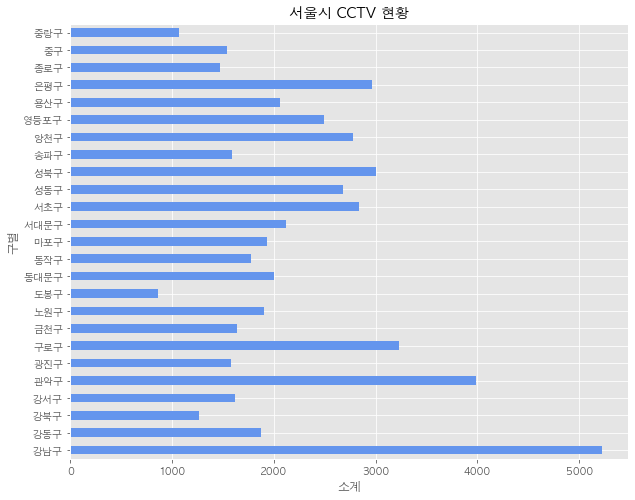

In [49]:
# 서울시 cctv 현황 차트 그리기 
plt.style.use('ggplot')
data_result['소계'].plot(
            kind = 'barh',
            color = 'cornflowerblue',
            figsize = [10,8])
plt.title("서울시 CCTV 현황")
plt.ylabel('구별')
plt.xlabel('소계')
plt.show()